In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [44]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [45]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
df.shape

(150, 5)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

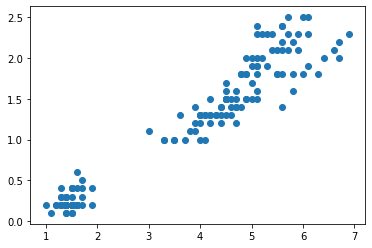

In [49]:
plt.scatter(df['petal_length'],df['petal_width'])

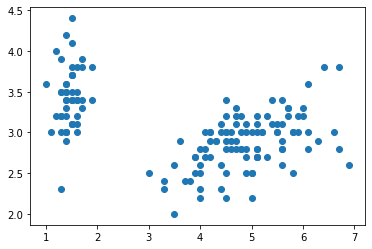

In [50]:
plt.scatter(df['petal_length'],df['sepal_width'])

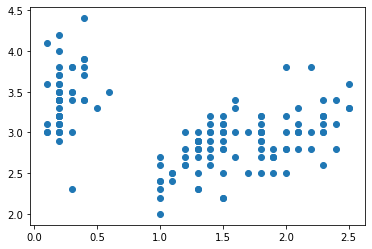

In [51]:
plt.scatter(df['petal_width'],df['sepal_width'])

In [52]:
import seaborn as sns

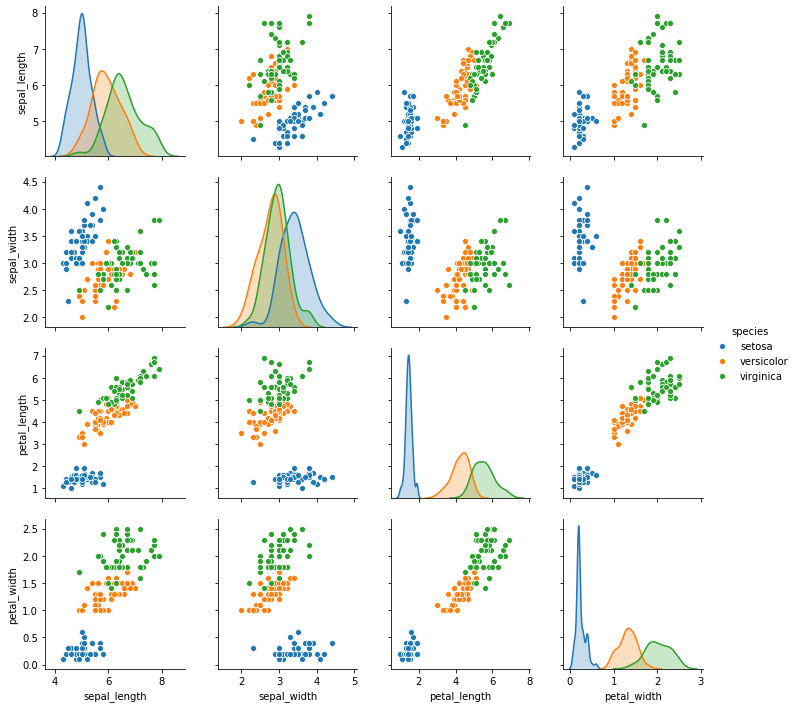

In [53]:
sns.pairplot(df,hue='species')

In [54]:
df2 = df[(df['species']=='setosa')| (df['species']=='virginica')]
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


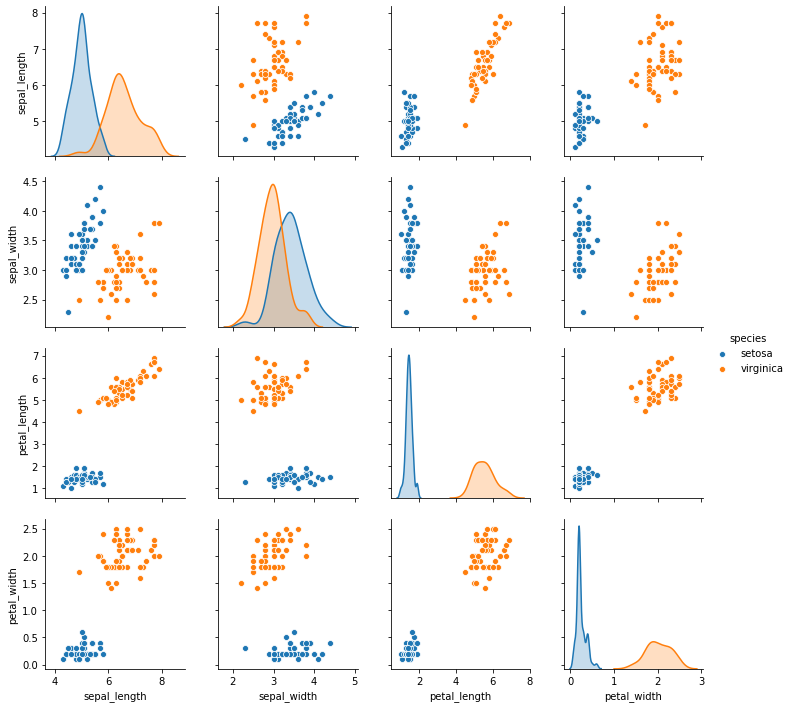

In [55]:
sns.pairplot(df2,hue='species')

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2.drop('species',axis=1),df2['species'],test_size=0.25,random_state=101)

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model.score(x_test,y_test)*100

100.0

In [60]:
df3 = df[(df['species']=='setosa')| (df['species']=='versicolor')]

In [61]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df3.drop('species',axis=1),df3['species'],test_size=0.25,random_state=101)

In [62]:
model2 = LogisticRegression()

In [63]:
model2.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
model2.score(x_test2,y_test2)*100

100.0

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
y_pred2 = model2.predict(x_test2)

In [67]:
print(confusion_matrix(y_test2,y_pred2))

[[15  0]
 [ 0 10]]


In [68]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

